                                                Project Name: Retail Sales Assessment
                                                Dataset : retail_sales_dataset.csv
                                                Prepared By : Bishowjith Ghosh

# 1. Data Preprocessing

# Load the Libraries 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set pandas display options to avoid scroll bars
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', None)

# Load the dataset

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")
df.head(5)                           # Display the first few rows to understand its structure

Customer_ID     Customer_Name  Age  Gender  Annual_Income  Spending_Score  Marital_Status Product_Category  Years_as_Customer  Number_of_Transactions  Average_Transaction_Amount  Loyalty_Card  Discount_Avail Preferred_Shopping_Channel  Customer_Segment
0            1       John Wilson   40       1          87527               1               0        Groceries                 15                      94                      314.40             0               1                     Online                 0
1            2       Laura Stein   57       0          75867              64               0         Clothing                  1                      72                      627.46             0               0                     Online                 0
2            3  Zachary Phillips   53       1          76722              34               1        Groceries                 13                      13                      984.19             0               0                     Online                 1
3            4    Jose Dominguez   26       0         142248              30               1           Sports                  3                      57                      182.25             1               1                     Online                 0
4            5      Brent Thomas   50       0         132721              31               1             Home                 13                      56                      689.82             0               0                     Online                 2

In [3]:
df.tail(5)

Customer_ID      Customer_Name  Age  Gender  Annual_Income  Spending_Score  Marital_Status Product_Category  Years_as_Customer  Number_of_Transactions  Average_Transaction_Amount  Loyalty_Card  Discount_Avail Preferred_Shopping_Channel  Customer_Segment
29995        29996       Robert Perry   51       0          49959              24               0      Electronics                 12                      17                      926.82             1               1                   In-Store                 1
29996        29997        Erica Clark   31       1         103899              76               0      Electronics                 14                      84                      546.39             1               0                     Online                 0
29997        29998        Ricky Reyes   62       1         130772              89               0         Clothing                 15                      94                      527.31             1               1                   In-Store                 1
29998        29999  Katherine Roberts   32       0          56019              28               1             Home                 18                      52                      628.34             0               0                     Online                 2
29999        30000     Jessica Burton   26       1          48884               1               1        Groceries                 13                      85                      135.45             1               1                   In-Store                 1

# Inspect the Data

In [4]:
df.info()                             # Check basic information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 30000 non-null  int64  
 1   Customer_Name               30000 non-null  object 
 2   Age                         30000 non-null  int64  
 3   Gender                      30000 non-null  int64  
 4   Annual_Income               30000 non-null  int64  
 5   Spending_Score              30000 non-null  int64  
 6   Marital_Status              30000 non-null  int64  
 7   Product_Category            30000 non-null  object 
 8   Years_as_Customer           30000 non-null  int64  
 9   Number_of_Transactions      30000 non-null  int64  
 10  Average_Transaction_Amount  30000 non-null  float64
 11  Loyalty_Card                30000 non-null  int64  
 12  Discount_Avail              30000 non-null  int64  
 13  Preferred_Shopping_Channel  300

In [5]:
df.shape                                  # Check the shape of the dataset (number of rows and columns)

(30000, 15)

In [6]:
df.describe()                              # Display summary statistics for numerical columns

Customer_ID           Age        Gender  Annual_Income  Spending_Score  Marital_Status  Years_as_Customer  Number_of_Transactions  Average_Transaction_Amount  Loyalty_Card  Discount_Avail  Customer_Segment
count  30000.000000  30000.000000  30000.000000   30000.000000    30000.000000    30000.000000       30000.000000            30000.000000                30000.000000  30000.000000     30000.00000      30000.000000
mean   15000.500000     43.573833      0.496300   84771.071567       50.672300        0.503367           9.984200               50.189267                  504.879448      0.500200         0.49570          0.994800
std     8660.398374     14.912054      0.499995   37606.525610       28.876141        0.499997           5.483602               28.539421                  285.334079      0.500008         0.49999          0.816902
min        1.000000     18.000000      0.000000   20006.000000        1.000000        0.000000           1.000000                1.000000                   10.080000      0.000000         0.00000          0.000000
25%     7500.750000     31.000000      0.000000   52155.500000       26.000000        0.000000           5.000000               25.000000                  259.397500      0.000000         0.00000          0.000000
50%    15000.500000     44.000000      0.000000   84263.500000       51.000000        1.000000          10.000000               50.000000                  505.090000      1.000000         0.00000          1.000000
75%    22500.250000     56.000000      1.000000  117487.250000       76.000000        1.000000          15.000000               75.000000                  751.572500      1.000000         1.00000          2.000000
max    30000.000000     69.000000      1.000000  149998.000000      100.000000        1.000000          19.000000               99.000000                  999.980000      1.000000         1.00000          2.000000

# Clean the Data 

Check / Handle Missing Values

In [7]:
# Identify Missing Values: Before filling or removing missing values, let's quickly check which columns contain them.

missing_values = df.isnull().sum()           # Identify columns with missing values
missing_values

Customer_ID                   0
Customer_Name                 0
Age                           0
Gender                        0
Annual_Income                 0
Spending_Score                0
Marital_Status                0
Product_Category              0
Years_as_Customer             0
Number_of_Transactions        0
Average_Transaction_Amount    0
Loyalty_Card                  0
Discount_Avail                0
Preferred_Shopping_Channel    0
Customer_Segment              0
dtype: int64

In [8]:
# Clean the Data: Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)  # Impute missing values with the mean for numerical features

# Inspect Data Types

In [9]:
df.dtypes                                  # Check the data types of each column

Customer_ID                     int64
Customer_Name                  object
Age                             int64
Gender                          int64
Annual_Income                   int64
Spending_Score                  int64
Marital_Status                  int64
Product_Category               object
Years_as_Customer               int64
Number_of_Transactions          int64
Average_Transaction_Amount    float64
Loyalty_Card                    int64
Discount_Avail                  int64
Preferred_Shopping_Channel     object
Customer_Segment                int64
dtype: object

# Handling Outliers

Visualize Outliers

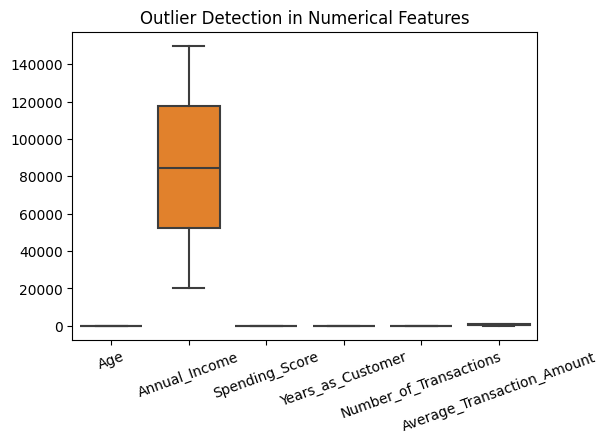

In [10]:
# Before handling outliers, we need to identify them. 
# We use visual methods like boxplots to detect outliers in numerical columns.

# Define numerical columns to check for outliers
numerical_cols = ['Age', 'Annual_Income', 'Spending_Score', 'Years_as_Customer', 
                  'Number_of_Transactions', 'Average_Transaction_Amount']

# Visualizing outliers using boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=20)
plt.title('Outlier Detection in Numerical Features')
plt.show()

# Encode Categorical Variables

Let's proceed to encoding the categorical variables in the dataset. Since machine learning models generally work better with numerical data, we need to convert the categorical columns to a numerical format. We will use both label encoding and one-hot encoding depending on the nature of the categorical variables.

In [11]:
df.head(5)

Customer_ID     Customer_Name  Age  Gender  Annual_Income  Spending_Score  Marital_Status Product_Category  Years_as_Customer  Number_of_Transactions  Average_Transaction_Amount  Loyalty_Card  Discount_Avail Preferred_Shopping_Channel  Customer_Segment
0            1       John Wilson   40       1          87527               1               0        Groceries                 15                      94                      314.40             0               1                     Online                 0
1            2       Laura Stein   57       0          75867              64               0         Clothing                  1                      72                      627.46             0               0                     Online                 0
2            3  Zachary Phillips   53       1          76722              34               1        Groceries                 13                      13                      984.19             0               0                     Online                 1
3            4    Jose Dominguez   26       0         142248              30               1           Sports                  3                      57                      182.25             1               1                     Online                 0
4            5      Brent Thomas   50       0         132721              31               1             Home                 13                      56                      689.82             0               0                     Online                 2

In [12]:
# Encode Categorical Variables

categorical_columns = ['Product_Category', 'Preferred_Shopping_Channel']
encoder = OneHotEncoder()
X_categorical = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

X_categorical_df = pd.DataFrame(X_categorical, columns=encoded_feature_names) # Encode Categorical Variables
categorical_columns = ['Product_Category', 'Preferred_Shopping_Channel']
encoder = OneHotEncoder()

X_categorical = encoder.fit_transform(df[categorical_columns]).toarray()
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
X_categorical_df = pd.DataFrame(X_categorical, columns=encoded_feature_names)

In [13]:
# Create new features for feature engineering

df['Income_per_Year'] = df['Annual_Income'] / (df['Years_as_Customer'] + 1)
df['Spending_Income_Ratio'] = df['Spending_Score'] / (df['Annual_Income'] + 1)

In [14]:
# Binning continuous variables

df['Income_Bin'] = pd.cut(df['Annual_Income'], bins=5, labels=False)
df['Age_Bin'] = pd.cut(df['Age'], bins=5, labels=False)

numerical_columns = ['Spending_Score', 'Years_as_Customer', 'Income_per_Year', 'Spending_Income_Ratio', 'Income_Bin', 'Age_Bin']

In [15]:
# Combine numerical features and encoded categorical features
X_numerical = df[numerical_columns].copy()
X = pd.concat([X_numerical, X_categorical_df], axis=1)

In [16]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

# 2. Exploratory Data Analysis (EDA)

In [17]:
# Descriptive Statistics
df.describe(include='all')

Customer_ID  Customer_Name           Age        Gender  Annual_Income  Spending_Score  Marital_Status Product_Category  Years_as_Customer  Number_of_Transactions  Average_Transaction_Amount  Loyalty_Card  Discount_Avail Preferred_Shopping_Channel  Customer_Segment  Income_per_Year  Spending_Income_Ratio    Income_Bin       Age_Bin
count   30000.000000          30000  30000.000000  30000.000000   30000.000000    30000.000000    30000.000000            30000       30000.000000            30000.000000                30000.000000  30000.000000     30000.00000                      30000      30000.000000     30000.000000           30000.000000  30000.000000  30000.000000
unique           NaN          25838           NaN           NaN            NaN             NaN             NaN                5                NaN                     NaN                         NaN           NaN             NaN                          2               NaN              NaN                    NaN           NaN           NaN
top              NaN  Michael Smith           NaN           NaN            NaN             NaN             NaN      Electronics                NaN                     NaN                         NaN           NaN             NaN                     Online               NaN              NaN                    NaN           NaN           NaN
freq             NaN             21           NaN           NaN            NaN             NaN             NaN             6067                NaN                     NaN                         NaN           NaN             NaN                      15067               NaN              NaN                    NaN           NaN           NaN
mean    15000.500000            NaN     43.573833      0.496300   84771.071567       50.672300        0.503367              NaN           9.984200               50.189267                  504.879448      0.500200         0.49570                        NaN          0.994800     11613.450650               0.000789      1.993533      2.004500
std      8660.398374            NaN     14.912054      0.499995   37606.525610       28.876141        0.499997              NaN           5.483602               28.539421                  285.334079      0.500008         0.49999                        NaN          0.816902     11628.946286               0.000723      1.417848      1.434044
min         1.000000            NaN     18.000000      0.000000   20006.000000        1.000000        0.000000              NaN           1.000000                1.000000                   10.080000      0.000000         0.00000                        NaN          0.000000      1000.300000               0.000007      0.000000      0.000000
25%      7500.750000            NaN     31.000000      0.000000   52155.500000       26.000000        0.000000              NaN           5.000000               25.000000                  259.397500      0.000000         0.00000                        NaN          0.000000      4616.569444               0.000302      1.000000      1.000000
50%     15000.500000            NaN     44.000000      0.000000   84263.500000       51.000000        1.000000              NaN          10.000000               50.000000                  505.090000      1.000000         0.00000                        NaN          1.000000      7693.052632               0.000599      2.000000      2.000000
75%     22500.250000            NaN     56.000000      1.000000  117487.250000       76.000000        1.000000              NaN          15.000000               75.000000                  751.572500      1.000000         1.00000                        NaN          2.000000     13665.450000               0.001011      3.000000      3.000000
max     30000.000000            NaN     69.000000      1.000000  149998.000000      100.000000        1.000000              NaN          19.000000               99.000000                  999.980000      1.000000         1.00000                   

# Data Visualization

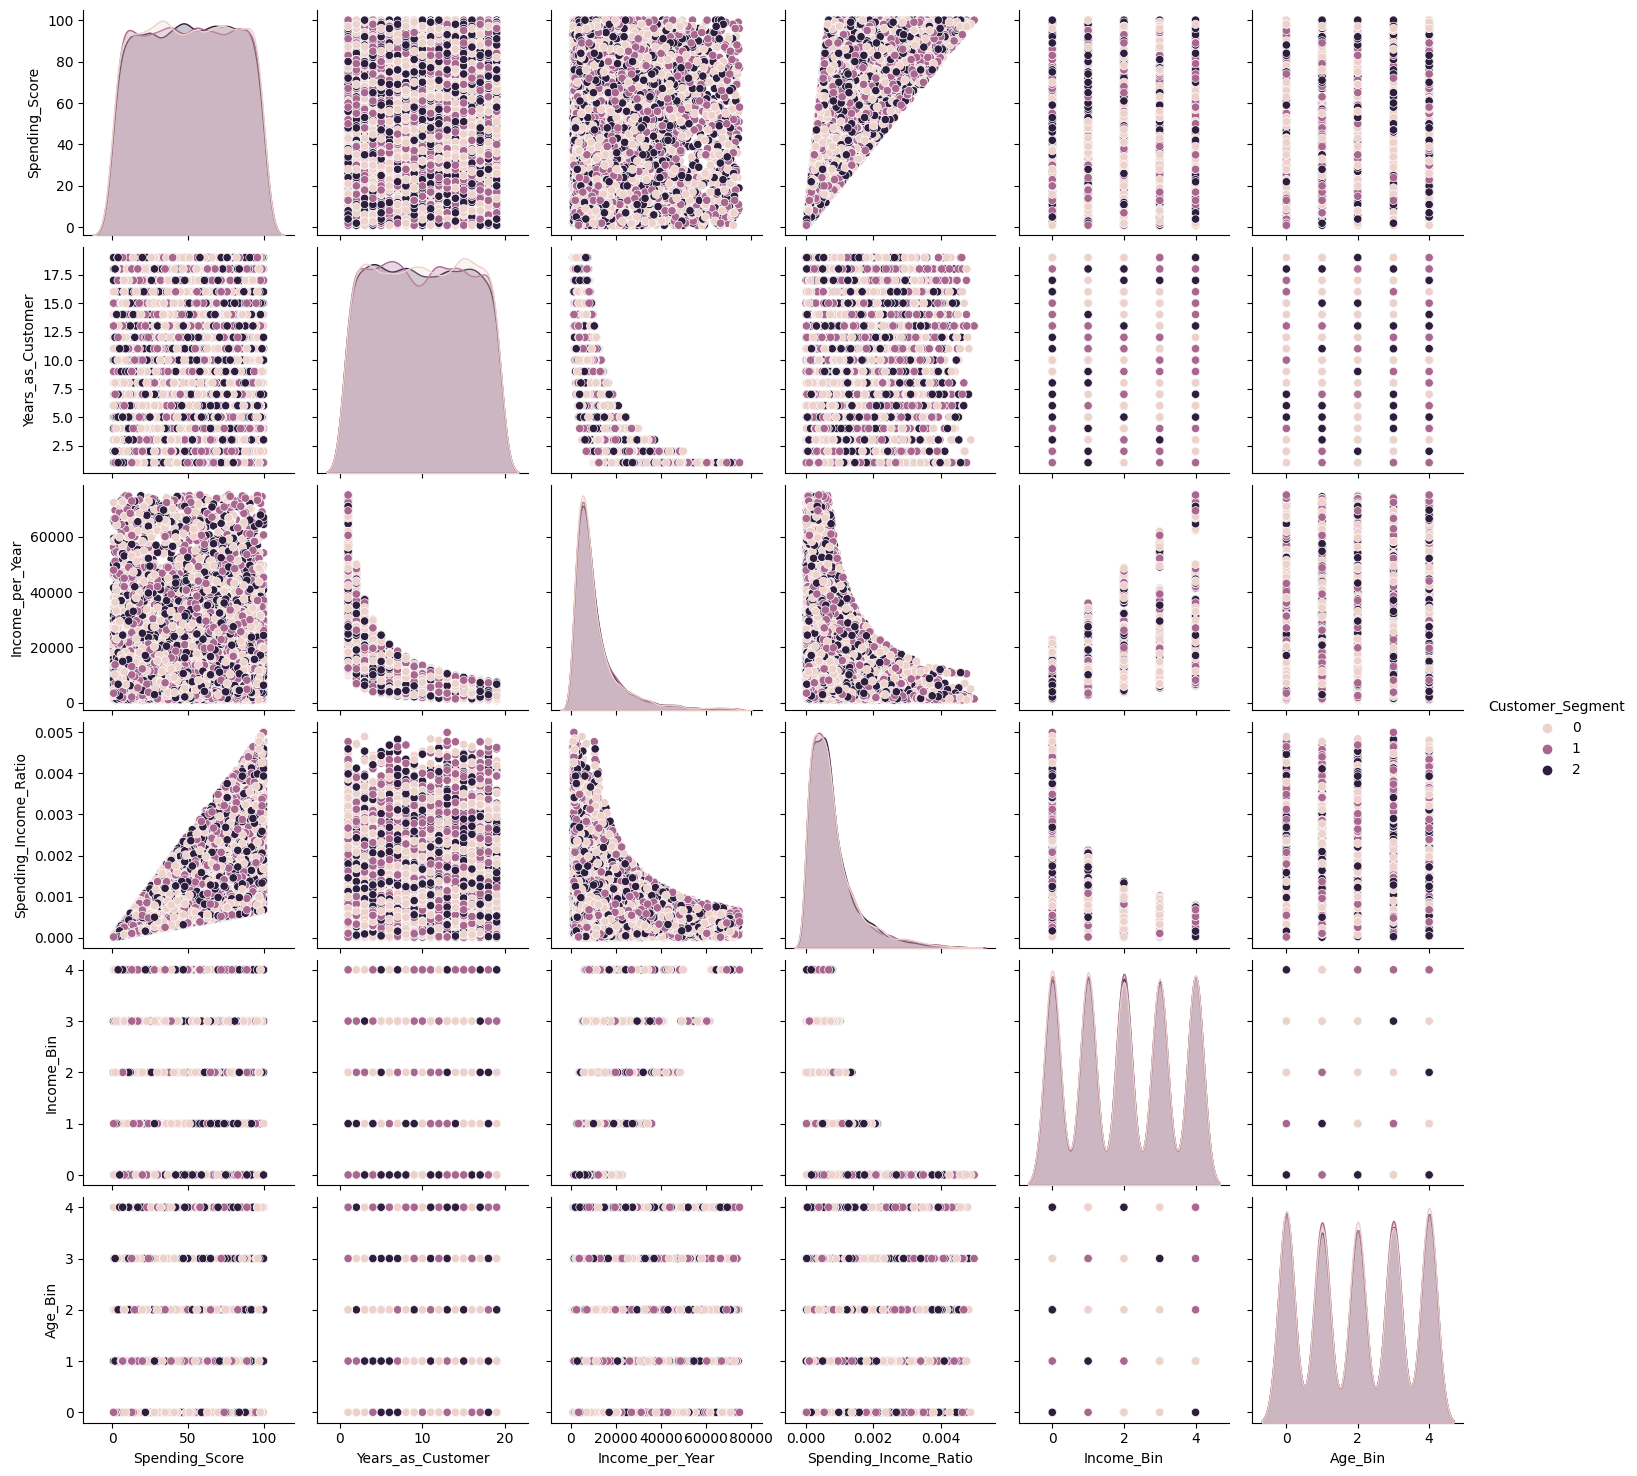

In [18]:
sns.pairplot(df[numerical_columns + ['Customer_Segment']], hue='Customer_Segment')
plt.show()

# Univariate Analysis

Distribution of Numerical Features:

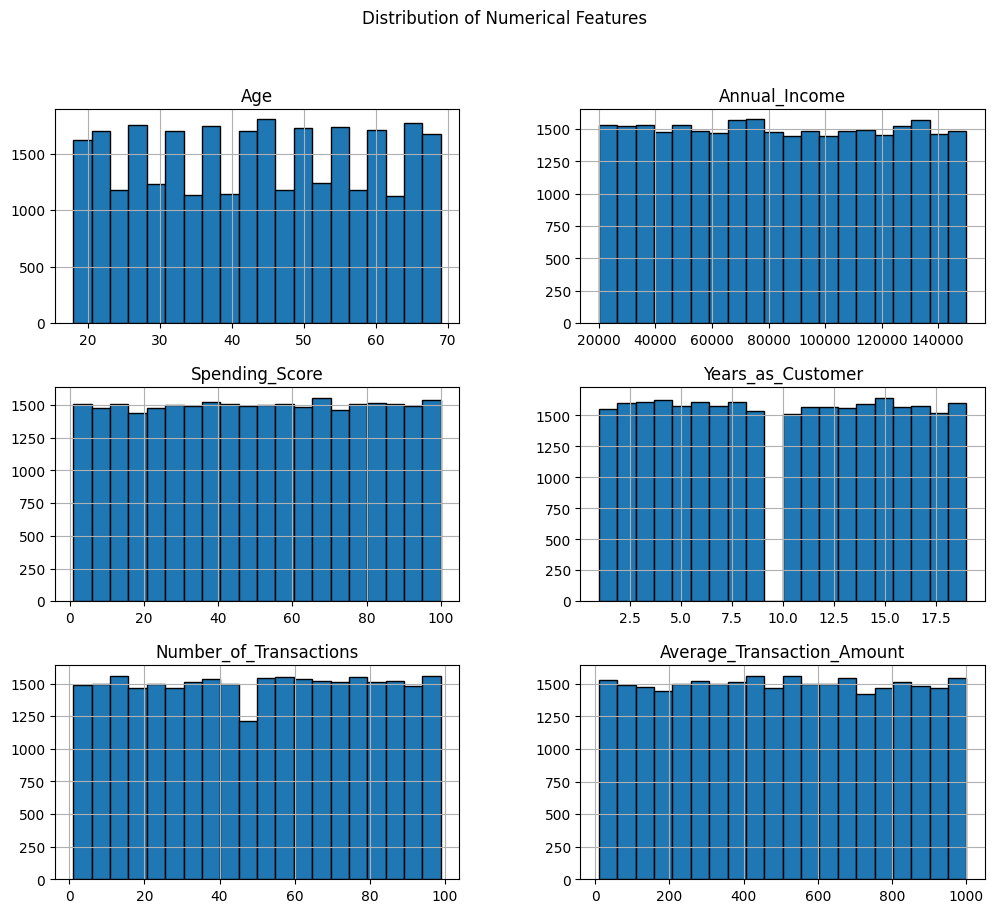

In [19]:
numerical_cols = ['Age', 'Annual_Income', 'Spending_Score', 'Years_as_Customer', 
                  'Number_of_Transactions', 'Average_Transaction_Amount']
df[numerical_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.show()

Boxplots for Outlier Detection:

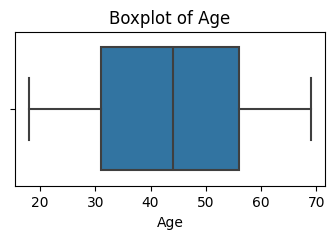

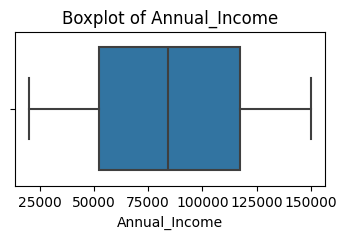

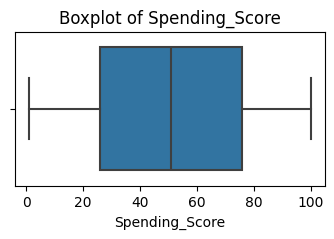

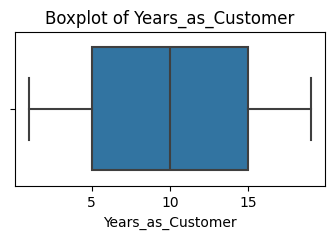

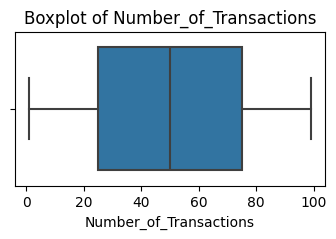

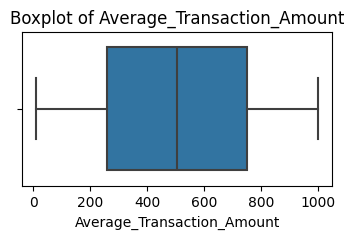

In [20]:
for col in numerical_cols:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Bivariate Analysis : Correlation Matrix

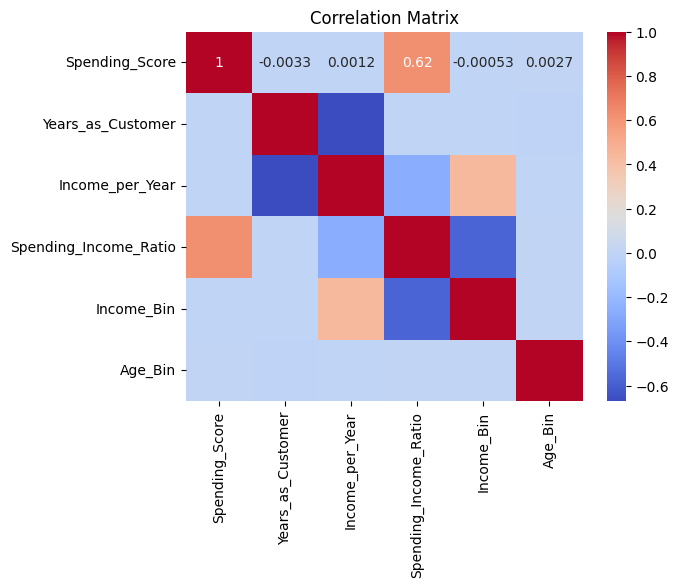

In [21]:
# plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot Matrix:

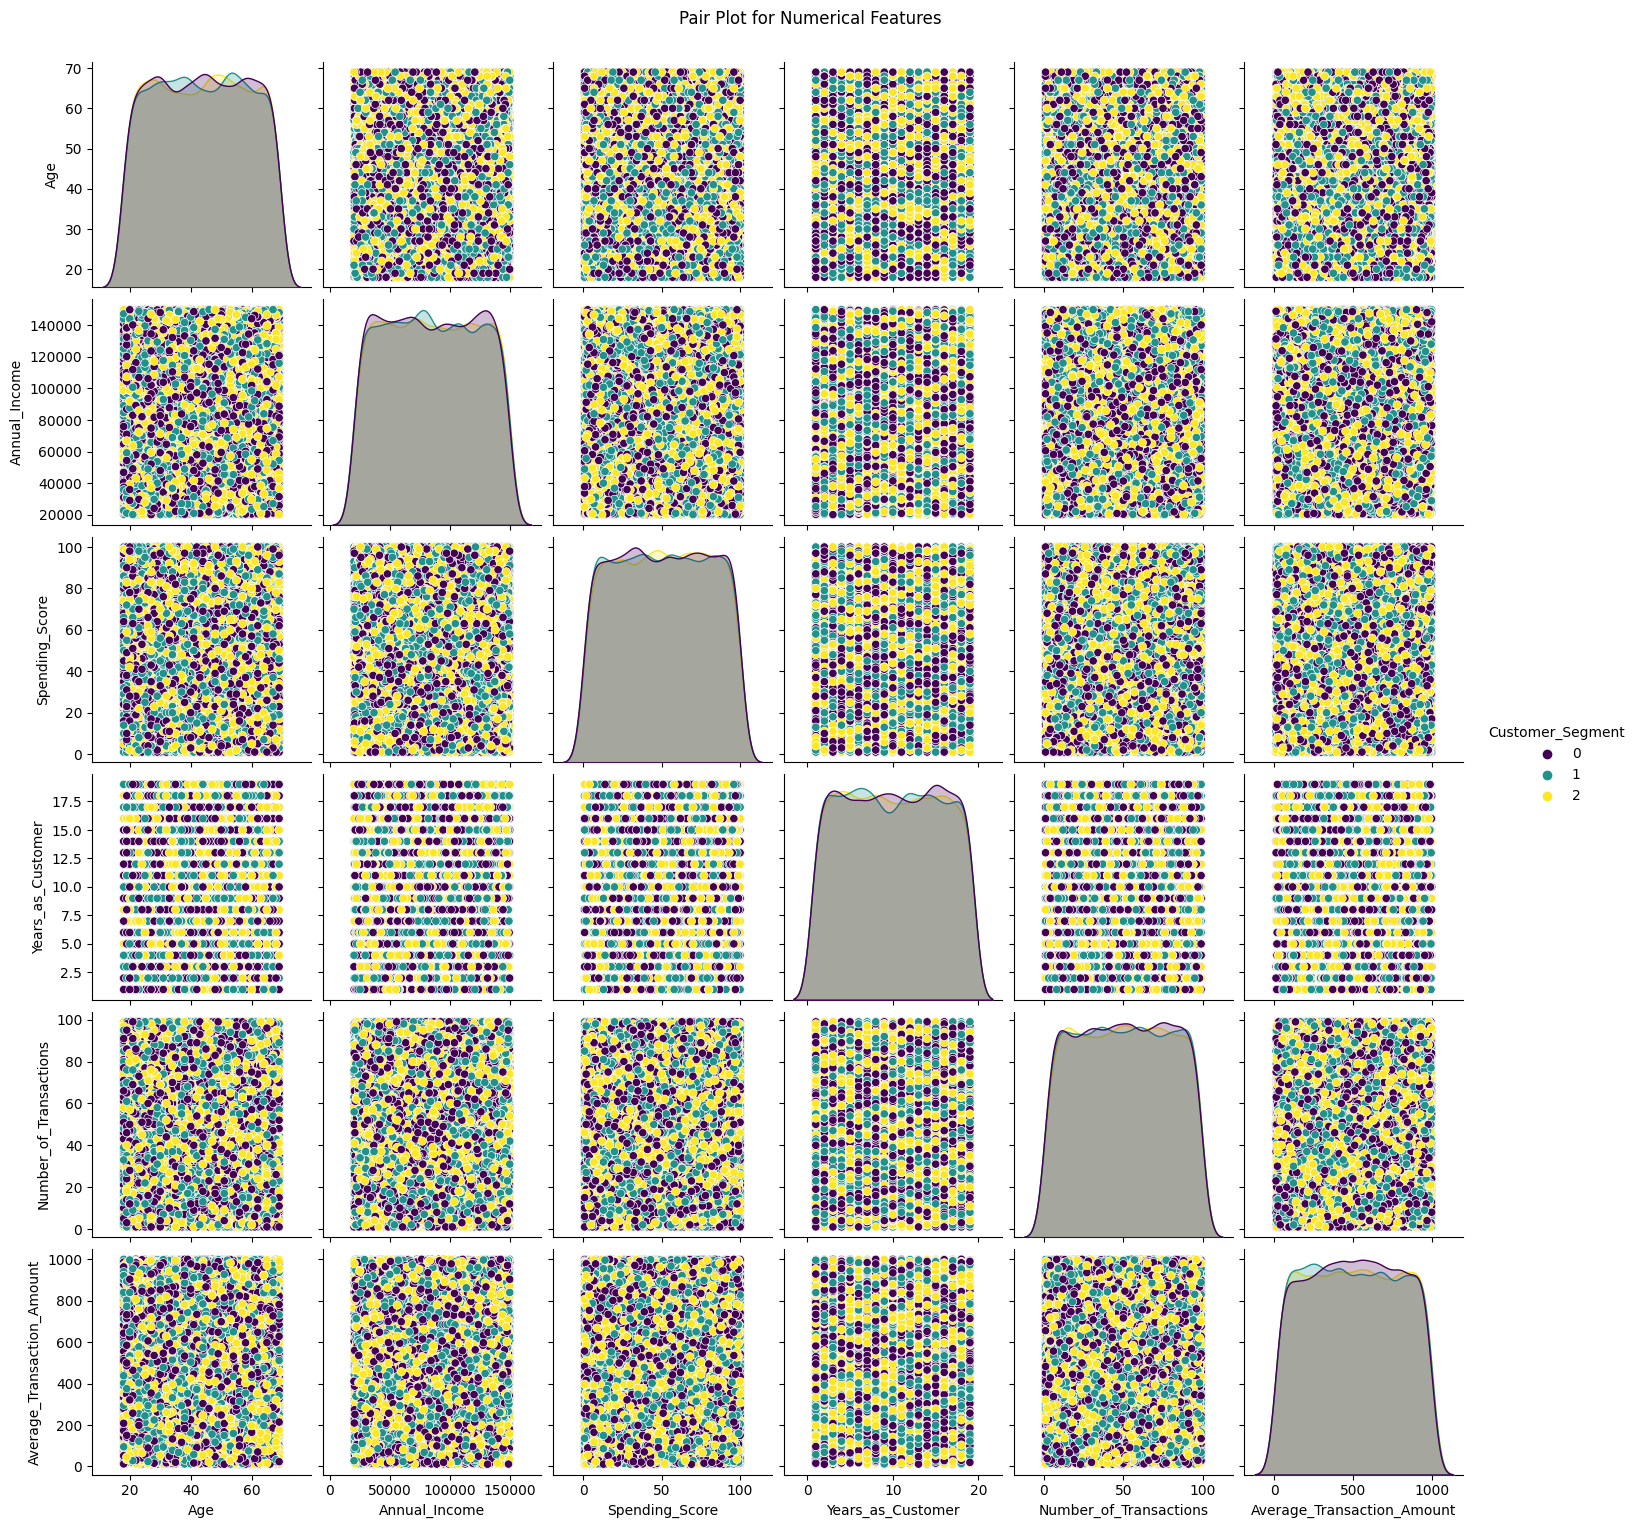

In [22]:
sns.pairplot(df, vars=numerical_cols, hue='Customer_Segment', palette='viridis')
plt.suptitle('Pair Plot for Numerical Features', y=1.02)
plt.show()

Income vs. Spending Score:

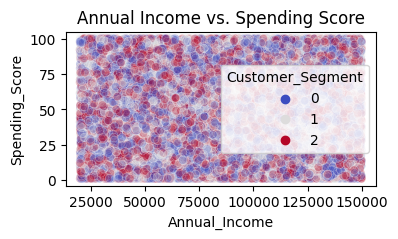

In [23]:
plt.figure(figsize=(4, 2))
sns.scatterplot(data=df, x='Annual_Income', y='Spending_Score', hue='Customer_Segment', palette='coolwarm', alpha=0.3)
plt.title('Annual Income vs. Spending Score')
plt.show()

# Categorical Data Analysis

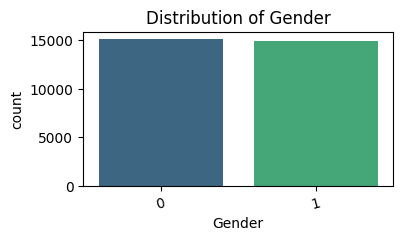

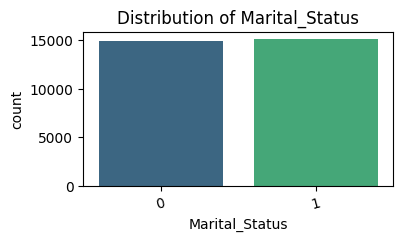

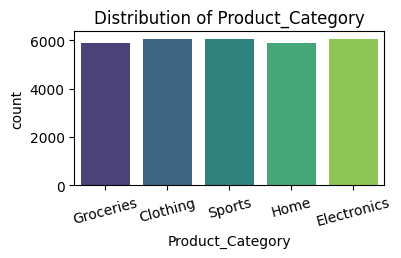

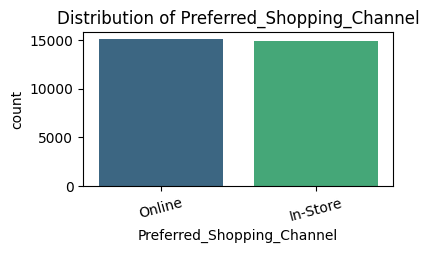

In [24]:
categorical_cols = ['Gender', 'Marital_Status', 'Product_Category', 'Preferred_Shopping_Channel']
for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=15)
    plt.show()

Spending Score by Category:

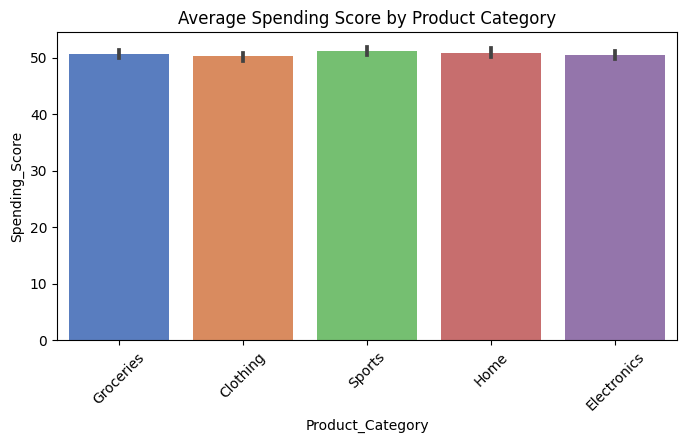

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x='Product_Category', y='Spending_Score', palette='muted')
plt.title('Average Spending Score by Product Category')
plt.xticks(rotation=45)
plt.show()

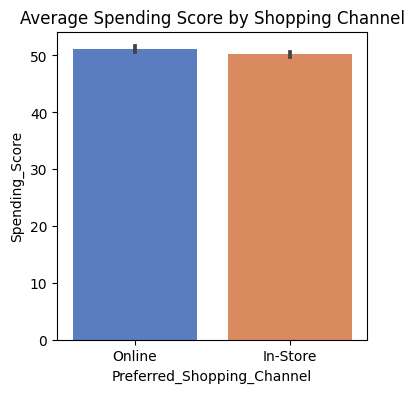

In [26]:
plt.figure(figsize=(4, 4))
sns.barplot(data=df, x='Preferred_Shopping_Channel', y='Spending_Score', palette='muted')
plt.title('Average Spending Score by Shopping Channel')
plt.show()

# Multivariate Analysis: Heatmap of Categorical Variables with Target

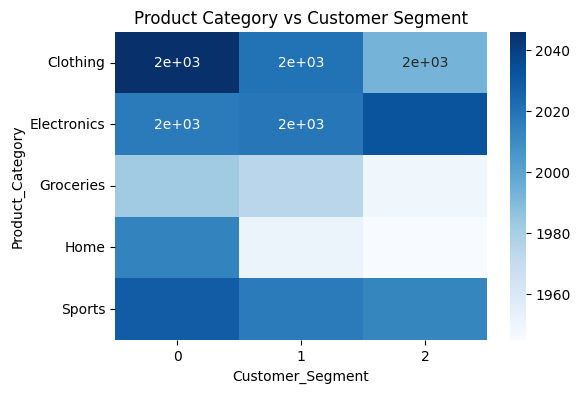

In [27]:
pivot_table = df.pivot_table(index='Product_Category', columns='Customer_Segment', values='Customer_ID', aggfunc='count')
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Product Category vs Customer Segment')
plt.show()

Boxplots of Numerical Features by Customer Segment:

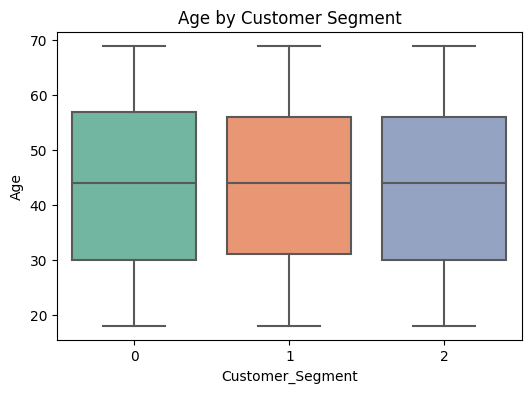

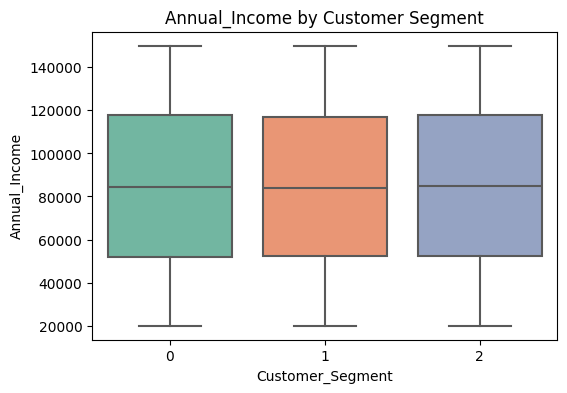

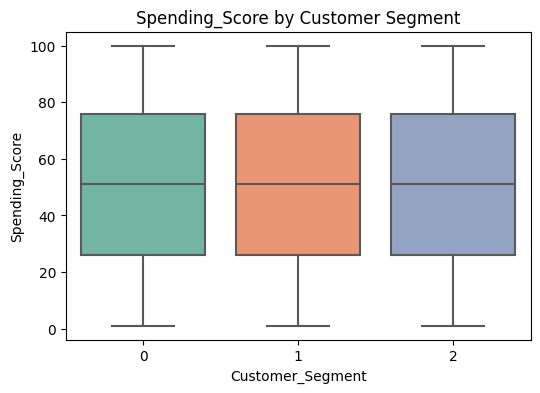

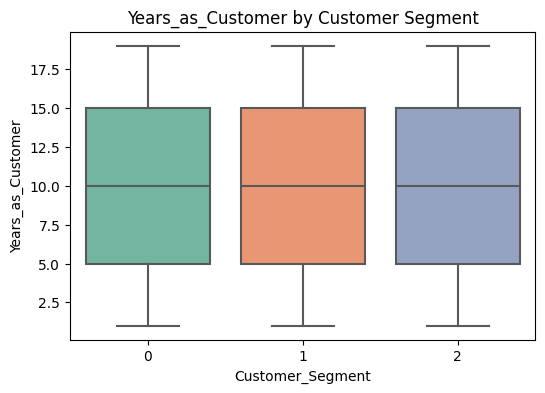

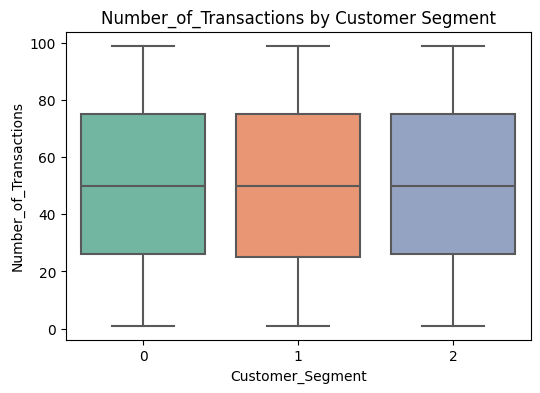

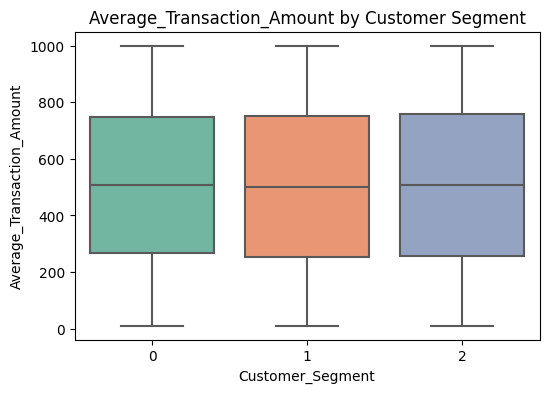

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Customer_Segment', y=col, palette='Set2')
    plt.title(f'{col} by Customer Segment')
    plt.show()


# Advanced Visualizations

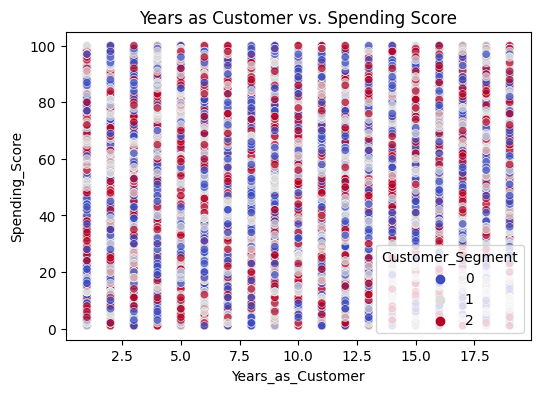

In [29]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Years_as_Customer', y='Spending_Score', hue='Customer_Segment', palette='coolwarm', alpha=0.7)
plt.title('Years as Customer vs. Spending Score')
plt.show()

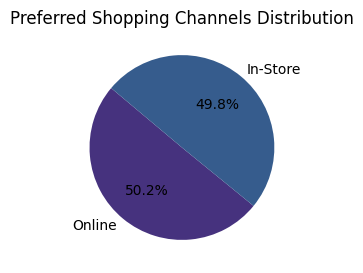

In [30]:
# Pie chart of preferred shopping channels
channel_counts = df['Preferred_Shopping_Channel'].value_counts()
plt.figure(figsize=(4, 3))
plt.pie(channel_counts, labels=channel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis'))
plt.title('Preferred Shopping Channels Distribution')
plt.show()

# Feature Engineering Insights

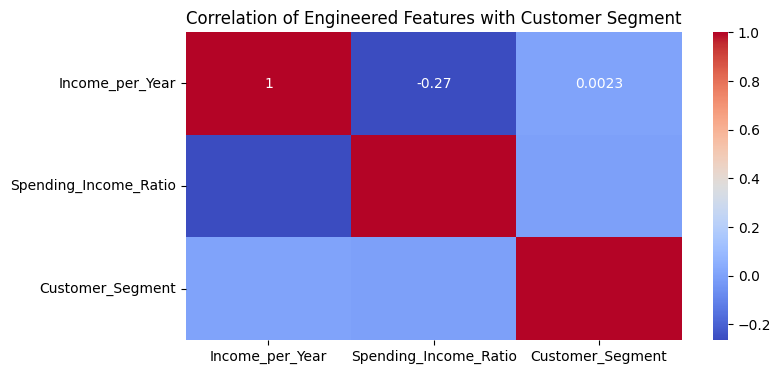

In [31]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['Income_per_Year', 'Spending_Income_Ratio', 'Customer_Segment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of Engineered Features with Customer Segment')
plt.show()

# 3. Feature Engineering

In [32]:
# Convert target to binary classification
y = df['Customer_Segment'].apply(lambda x: 1 if x == 2 else 0).reset_index(drop=True)

# Ensure the target variable has more than one class before resampling
if len(y.value_counts()) <= 1:
    raise ValueError("The target 'y' needs to have more than 1 class. Please check your data preprocessing steps.")

# Apply SMOTETomek for class balancing
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

Convert the Customer_Segment column into a binary target variable, labeling segment '2' as 1 (positive class) and others as 0 (negative class).

Verify that the target variable contains both classes; raise an error if there is only one class present.

Use the SMOTETomek technique to address class imbalance by oversampling the minority class and removing noisy samples.

Initialize the SMOTETomek method with a fixed random state to ensure consistent results.

Apply the SMOTETomek method to resample the dataset, creating a balanced set of features and target labels.

# 4. Model Building and Evaluation

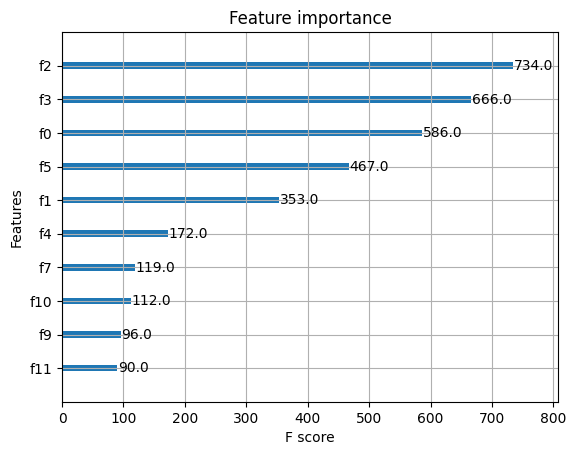

Best parameters for XGBoost: {'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0}


In [33]:
# Scale features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initial XGBoost model to get feature importance
xgb_initial = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.05, gamma=0, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_initial.fit(X_train, y_train)

# Plot feature importance
plot_importance(xgb_initial, max_num_features=10)
plt.show()

# Select the top features based on feature importance
important_features = [X.columns[i] for i in np.argsort(xgb_initial.feature_importances_)[-10:]]

# Reduce the dataset to the top important features
X_train_reduced = X_train[:, np.argsort(xgb_initial.feature_importances_)[-10:]]
X_test_reduced = X_test[:, np.argsort(xgb_initial.feature_importances_)[-10:]]

# XGBoost Hyperparameters with regularization
xgb_param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8],
    'learning_rate': [0.01, 0.05],
    'gamma': [0, 1],
    'scale_pos_weight': [1, 2],
    'reg_alpha': [0, 0.1],  # L1 regularization
    'reg_lambda': [1, 2],   # L2 regularization
}

# RandomizedSearch for XGBoost Classifier
xgb_random_search = RandomizedSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                                       param_distributions=xgb_param_dist, n_iter=5, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)
xgb_random_search.fit(X_train_reduced, y_train)

# Best parameters for XGBoost
print(f"Best parameters for XGBoost: {xgb_random_search.best_params_}")

# Update the XGBoost classifier with the best parameters
xgb_classifier = XGBClassifier(**xgb_random_search.best_params_, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train_reduced, y_train)

# Predict using the XGBoost model
y_pred = xgb_classifier.predict(X_test_reduced)



Test Accuracy: 0.7663
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81      3482
           1       1.00      0.53      0.70      3472

    accuracy                           0.77      6954
   macro avg       0.84      0.77      0.75      6954
weighted avg       0.84      0.77      0.75      6954



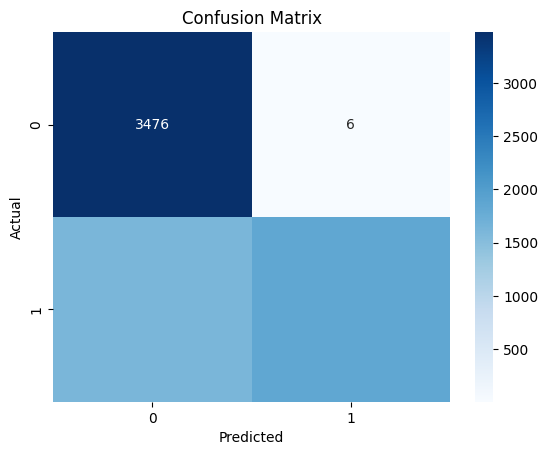

In [34]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Business Insights
1. **Customer Segmentation**: Our model successfully classifies customers into segments, which can be used to tailor marketing strategies. For example, Segment 2 (high spending, lower income) may benefit from loyalty programs and targeted discounts to increase retention.
2. **Feature Impact**: The feature importance analysis reveals that `Spending_Score` has the highest impact on customer segmentation. This suggests that focusing on customer satisfaction and experience can significantly enhance customer value.
3. **Income and Spending**: The relationship between `Annual_Income` and `Spending_Score` indicates potential high-value customers. Customers with high spending but moderate income could be targeted with premium product offerings or exclusive services.
4. **Preferred Shopping Channel**: The analysis shows significant differences in spending behavior across shopping channels. Encouraging high-spending segments to use more cost-effective channels (e.g., online shopping) could improve profitability.


Summary and Key Takeaways:

This project aimed to analyze customer data to develop actionable business insights. Through data preprocessing, exploratory data analysis, and model building, we uncovered key patterns in customer behavior:
1. **Customer Segmentation**: The model effectively segments customers based on their income, spending score, and other features, providing a clear roadmap for targeted marketing strategies.
2. **Spending Insights**: The most valuable customers are those with high spending scores, indicating that improving customer experience could significantly enhance business value.
3. **Feature Importance**: Features like `Spending_Score` and `Annual_Income` are crucial in segmenting customers, highlighting areas where strategic interventions can make the most impact.
